# Topological Data Analysis on Well-Trained Neural Networks for Binary Classification.

We begin by importing all the necessary packages and libraries. 

In [1]:
import tensorflow as tf
import numpy as np
import tensorflow.keras as keras
import gudhi as gd
import gudhi.representations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random as r
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 
from keras.models import Sequential

# The below line of code will allow the PCA graphs 
# to be freely spun by clicking and dragging on 
# them in the direction you wish to spin.

# %matplotlib notebook

We now read in and examine the data set. It should contain information about the image grey scale of a banknote (variance, skewness, curtosis, and entropy) as well as whether or not it was a genuine or a counterfit bill (class). The information about the bill has to do with the way the images were converted into numbers i.e. Wavelet Transformed Image. The data set and information about the dataset can be found here:

https://archive.ics.uci.edu/ml/datasets/banknote+authentication#

Here, the "class" column is our target where 0 represents a fake bill and 1 represents a genuine bill. We also have "variance," "skewness," "curtosis," and "entropy" as our attributes. Our neural network will have an input layer with four nodes (one for each attribute) and an output layer with one node (the predicted class). 

In [2]:
df = pd.read_csv("data_banknote_authentication.csv")

In [3]:
print(f"{df}\n")   # Print the first 5 rows of df. 
print(f"{df.info()}\n")   # Print the general information of df.

      variance  skewness  curtosis  entropy  class
0      3.62160   8.66610   -2.8073 -0.44699      0
1      4.54590   8.16740   -2.4586 -1.46210      0
2      3.86600  -2.63830    1.9242  0.10645      0
3      3.45660   9.52280   -4.0112 -3.59440      0
4      0.32924  -4.45520    4.5718 -0.98880      0
...        ...       ...       ...      ...    ...
1367   0.40614   1.34920   -1.4501 -0.55949      1
1368  -1.38870  -4.87730    6.4774  0.34179      1
1369  -3.75030 -13.45860   17.5932 -2.77710      1
1370  -3.56370  -8.38270   12.3930 -1.28230      1
1371  -2.54190  -0.65804    2.6842  1.19520      1

[1372 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 no

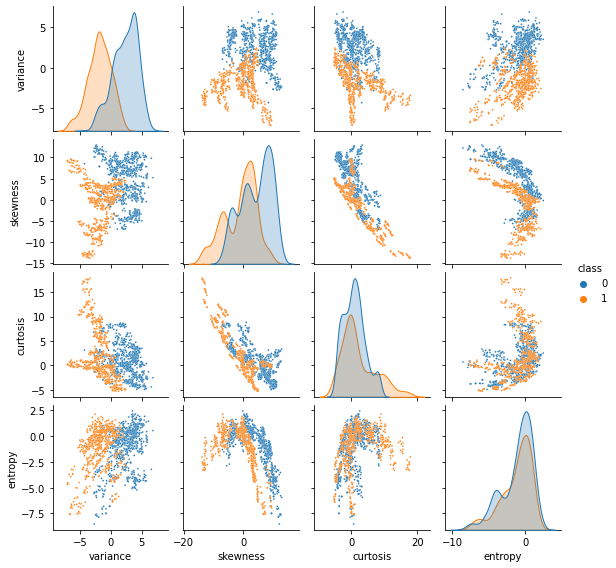

In [4]:
# Display a pairplot separated by class
sns.pairplot(df, hue='class', height=2, plot_kws={"s":3})

<AxesSubplot:xlabel='class', ylabel='count'>

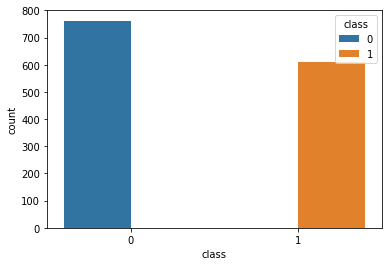

In [5]:
# Display the number of counterfeit and genuine banknotes 
sns.countplot(x='class', hue='class', data=df)

As we can see, we have 152 more counterfit bills than we do genuine. In order to not have any bias in our dataset, we will randomly remove 152 of the counterfit bills. 

In [6]:
rand_arr = r.sample(range(0, 152), 152)
df = df.drop(rand_arr)

In [7]:
df_genuine = df[df['class'] == 1]
df_counterfeit = df[df['class'] == 0]

df_genuine = df[df['class'] == 1]
df_counterfeit = df[df['class'] == 0]

print("Number of genuine bills: ")
print(df[df['class'] == 1]['class'].count())

print("Number of couterfit bills: ")
print(df[df['class'] == 0]['class'].count())

Number of genuine bills: 
610
Number of couterfit bills: 
610


<AxesSubplot:>

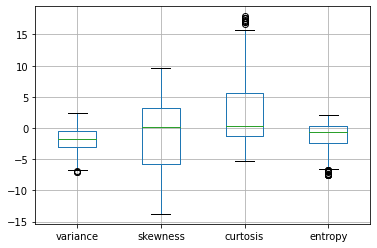

In [8]:
# Box plot for genuine bills
pd.DataFrame(df_genuine).drop('class', axis=1).boxplot() 

<AxesSubplot:>

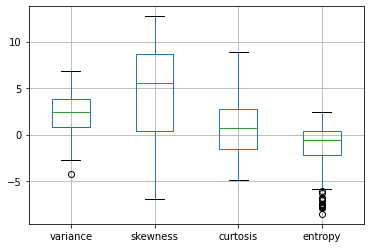

In [9]:
# Box plot for counterfeit bills
pd.DataFrame(df_counterfeit).drop('class', axis=1).boxplot() 

We now split the data set into attributes (variance, skewness, curtosis, and entropy) and the target (class). We also use Scikit-Learn's train_test_split module to seperate the data into the training and testing sets. We reserve 20% of the data for testing while the other 80% is for training. We also turn them into numpy arrays for ease of fitting later.

In [10]:
X = np.array(df[['variance', 'skewness', 'curtosis', 'entropy']], dtype=np.float64)
y = np.array(df['class'], dtype=np.int64)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

df_target = df['class']
df_features = df[['variance', 'skewness', 'curtosis', 'entropy']]

We create a dictionary that uses the name of the layer as its key and an array as its value. The array has the number of nodes in the layer as the 0 index and the activation function (if there is one) as the 1 index. Then, we define a sequential model object using the keras library and add the layers. We also specify the Adam optimizer and the Binary Cross Entropy loss function, as this is a binary classification problem. 

In [11]:
num_hidden = 20 # 20

layers = {"input": [4],
          "hidden_1": [num_hidden, tf.keras.activations.relu],
          "hidden_2": [num_hidden, tf.keras.activations.relu],
          "output": [1, tf.keras.activations.sigmoid]}

# 2 hidden layers

In [12]:
model = keras.Sequential()

model.add(tf.keras.layers.Dense(layers["hidden_1"][0], layers["hidden_1"][1], input_dim=layers["input"][0])) 
model.add(tf.keras.layers.Dense(layers["hidden_2"][0], layers["hidden_2"][1]))
model.add(tf.keras.layers.Dense(layers["output"][0], layers["output"][1]))

opt = keras.optimizers.Adam()
loss = keras.losses.BinaryCrossentropy()

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 60) # 60

Epoch 1/60
31/31 [==============================] - 1s 6ms/step - loss: 0.6437 - accuracy: 0.6199
Epoch 2/60
31/31 [==============================] - 0s 5ms/step - loss: 0.4592 - accuracy: 0.8555
Epoch 3/60
31/31 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.9631
Epoch 4/60
31/31 [==============================] - 0s 5ms/step - loss: 0.1847 - accuracy: 0.9877
Epoch 5/60
31/31 [==============================] - 0s 5ms/step - loss: 0.1128 - accuracy: 0.9877
Epoch 6/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0740 - accuracy: 0.9908
Epoch 7/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9928
Epoch 8/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 0.9949
Epoch 9/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0307 - accuracy: 0.9969
Epoch 10/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0250 - accuracy: 0.9969
Epoch 11/60
31/31 [

Here, we are saving the model and reading it back in. This way, we can access the trained model later on whithout having to retrain it. The top line should be commented out unless we wish to over-write the current model

In [13]:
# model.save("model_ReLU", overwrite=True, include_optimizer=True)

model_saved = keras.models.load_model("model_ReLU")

Let's get the weights and biases of this trained network assigned to some variables. The index format is as follows:

weights[layer[node]]

biases[layer[node]]

In [14]:
weights = []
biases = []

for layer_index, layer_val in enumerate(model_saved.layers):
    weights.append(layer_val.get_weights()[0])
    biases.append(layer_val.get_weights()[1])

Now, we re-create our the feed forward process in the neural network with the weights and biases from the trained model. We define a function that takes in a datum and returns output_vector, a multi-dimensional list. Output_vector has one entry for each layer (including the input layer) and each entry has as many elements as that layer has nodes. For example, a network with a 2-10-5-1 architecture will have an output_vector with 4 elements. Output_vector[0] has 2 elements, output_vector[1] has 10 elements, and so on. Each one of these elements is the output of a specific node. So, in our previous example, output_vector[1][2] will return the output of the third node in the second layer. This also means to get the prediction of the input_vector, we can simply call output_vector[-1].

In [15]:
def get_output_vector(input_vector):
    output_vector = [input_vector.tolist()]
    key_last = "input"
    k = 0
    
    for key in layers:
        z = 0
        a = []
        
        if key == key_last:
            continue
        for j in range(layers[key][0]):
            for i in range(layers[key_last][0]):
                z += output_vector[k][i]*weights[k][i][j]
            a.append(layers[key][1]((z+biases[k][j])).numpy())
        output_vector.append(a)
        key_last = key
        k += 1
    return output_vector

We define a list for each layer to hold its output. We call get_output_vector() for each row in our data frame and then send that data to the respective layers' list.

In [16]:
input_array = []
hidden_1_array = []
hidden_2_array = []
output_array = []

In [17]:
output_vector = []
class_vector = np.array(df_target.values.tolist())

for index, row in df_features.iterrows():
    output_vector.append(get_output_vector(row))

In [18]:
for index, row in enumerate(output_vector):
    input_array.append(output_vector[index][0])
    hidden_1_array.append(output_vector[index][1])
    hidden_2_array.append(output_vector[index][2])
    output_array.append(output_vector[index][3])

## PCA and Persistent Homology

We now preform PCA on the output of each layer in order to better visualize the separation of the data. Then, we use Gudhi to complute the Rips Complex of the point cloud generated by the data set. This allows us to plot to persistence diagram and persistence barcode of each layer. 

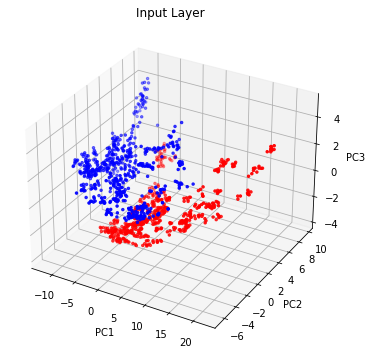

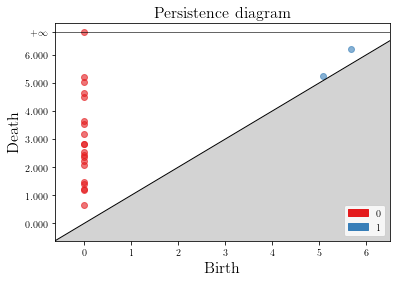

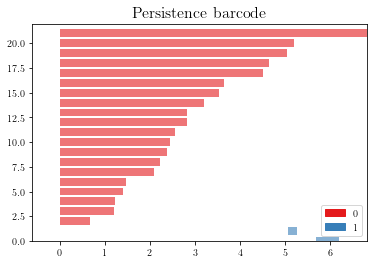

In [19]:
df = input_array

pca = PCA(n_components=3)
pca.fit(df)

result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_0['PCA0'], result_0['PCA1'], result_0['PCA2'], c='blue', cmap="r", s=6)
ax.scatter(result_1['PCA0'], result_1['PCA1'], result_1['PCA2'], c='red', cmap="b", s=6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Input Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcI = gd.RipsComplex(points=input_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmI = rcI.persistence()
gd.plot_persistence_diagram(rcdgmI, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmI, max_intervals=0, legend=True)

plt.show()

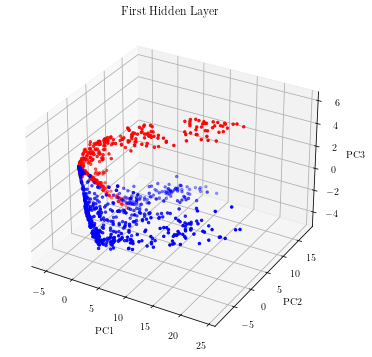

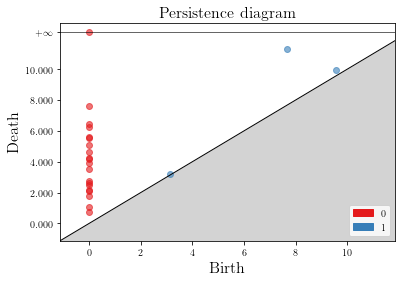

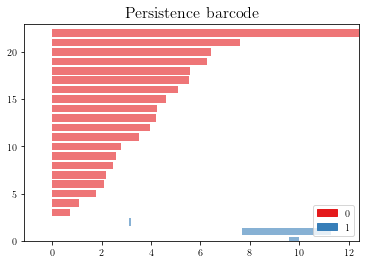

In [20]:
df1 = hidden_1_array

pca = PCA(n_components=3)
pca.fit(df1)

result=pd.DataFrame(pca.transform(df1), columns=['PCA%i' % i for i in range(3)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_0['PCA0'], result_0['PCA1'], result_0['PCA2'], c='blue', cmap="r", s=6)
ax.scatter(result_1['PCA0'], result_1['PCA1'], result_1['PCA2'], c='red', cmap="b", s=6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("First Hidden Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcH1 = gd.RipsComplex(points=hidden_1_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmH1 = rcH1.persistence()
gd.plot_persistence_diagram(rcdgmH1, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmH1, max_intervals=0, legend=True)

plt.show()

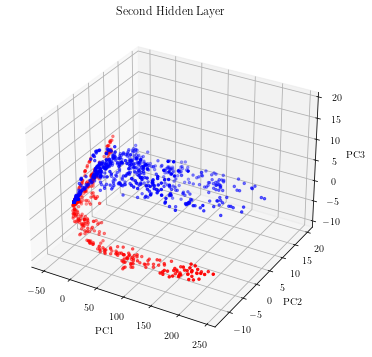

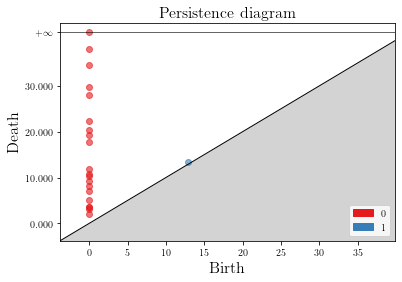

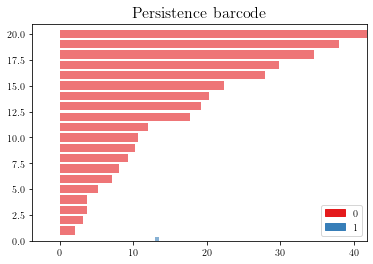

In [21]:
df1 = hidden_2_array

pca = PCA(n_components=3)
pca.fit(df1)

result=pd.DataFrame(pca.transform(df1), columns=['PCA%i' % i for i in range(3)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_0['PCA0'], result_0['PCA1'], result_0['PCA2'], c='blue', cmap="r", s=6)
ax.scatter(result_1['PCA0'], result_1['PCA1'], result_1['PCA2'], c='red', cmap="b", s=6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Second Hidden Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcH2 = gd.RipsComplex(points=hidden_2_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmH2 = rcH2.persistence()
gd.plot_persistence_diagram(rcdgmH2, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmH2, max_intervals=0, legend=True)

plt.show()

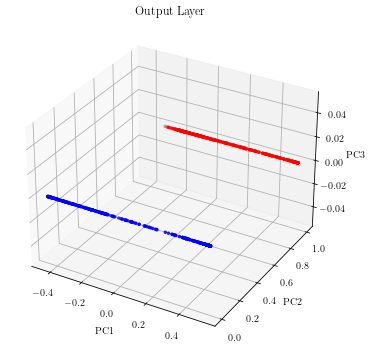

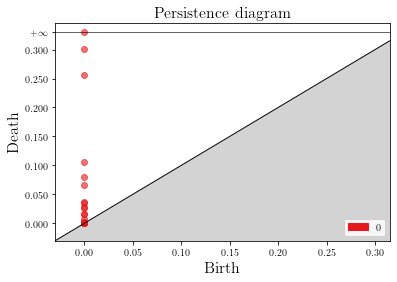

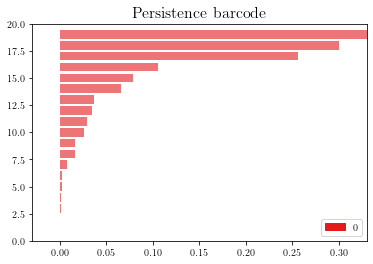

In [22]:
df1 = output_array

pca = PCA(n_components=1)
pca.fit(df1)

result=pd.DataFrame(pca.transform(df1), columns=['PCA%i' % i for i in range(1)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

zeros = np.empty(len(result_0))
zeros.fill(0)

ones = np.empty(len(result_1))
ones.fill(1)

ax.scatter( result_0['PCA0'], zeros, zeros, c='blue', s=6) # Counterfit
ax.scatter(result_1['PCA0'], ones, zeros, c='red', s=6) # Genuine

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Output Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcO = gd.RipsComplex(points=output_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmO = rcO.persistence()
gd.plot_persistence_diagram(rcdgmO, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmO, max_intervals=0, legend=True)

plt.show()

We now follow the same procedure, starting with the training, but with a hyperbolic tangent activation function raher than the ReLU activation function.

In [23]:
num_hidden = 20 # 20

layers = {"input": [4],
          "hidden_1": [num_hidden, tf.keras.activations.tanh],
          "hidden_2": [num_hidden, tf.keras.activations.tanh],
          "output": [1, tf.keras.activations.sigmoid]}

# 2 hidden layers

In [24]:
model = keras.Sequential()

model.add(tf.keras.layers.Dense(layers["hidden_1"][0], layers["hidden_1"][1], input_dim=layers["input"][0])) 
model.add(tf.keras.layers.Dense(layers["hidden_2"][0], layers["hidden_2"][1]))
model.add(tf.keras.layers.Dense(layers["output"][0], layers["output"][1]))

opt = keras.optimizers.Adam()
loss = keras.losses.BinaryCrossentropy()

model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 60) # 60

Epoch 1/60
31/31 [==============================] - 0s 6ms/step - loss: 0.6201 - accuracy: 0.6619
Epoch 2/60
31/31 [==============================] - 0s 5ms/step - loss: 0.4166 - accuracy: 0.8873
Epoch 3/60
31/31 [==============================] - 0s 5ms/step - loss: 0.2648 - accuracy: 0.9641
Epoch 4/60
31/31 [==============================] - 0s 5ms/step - loss: 0.1623 - accuracy: 0.9846
Epoch 5/60
31/31 [==============================] - 0s 5ms/step - loss: 0.1068 - accuracy: 0.9887
Epoch 6/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0759 - accuracy: 0.9898
Epoch 7/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9928
Epoch 8/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9959
Epoch 9/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0375 - accuracy: 0.9959
Epoch 10/60
31/31 [==============================] - 0s 5ms/step - loss: 0.0317 - accuracy: 0.9959
Epoch 11/60
31/31 [

In [25]:
# model.save("model_tanh", overwrite=True, include_optimizer=True)

model_saved = keras.models.load_model("model_tanh")

In [26]:
weights = []
biases = []

for layer_index, layer_val in enumerate(model_saved.layers):
    weights.append(layer_val.get_weights()[0])
    biases.append(layer_val.get_weights()[1])

In [27]:
input_array = []
hidden_1_array = []
hidden_2_array = []
output_array = []

In [28]:
output_vector = []
class_vector = np.array(df_target.values.tolist())

for index, row in df_features.iterrows():
    output_vector.append(get_output_vector(row))

In [29]:
for index, row in enumerate(output_vector):
    input_array.append(output_vector[index][0])
    hidden_1_array.append(output_vector[index][1])
    hidden_2_array.append(output_vector[index][2])
    output_array.append(output_vector[index][3])

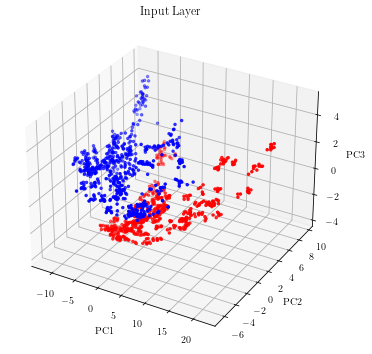

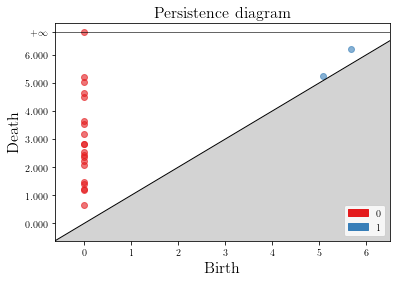

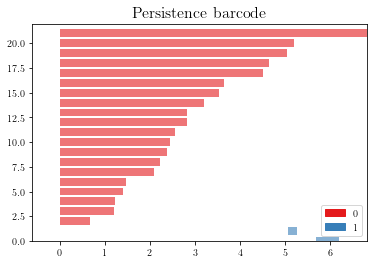

In [30]:
df = input_array

pca = PCA(n_components=3)
pca.fit(df)

result=pd.DataFrame(pca.transform(df), columns=['PCA%i' % i for i in range(3)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_0['PCA0'], result_0['PCA1'], result_0['PCA2'], c='blue', cmap="r", s=6)
ax.scatter(result_1['PCA0'], result_1['PCA1'], result_1['PCA2'], c='red', cmap="b", s=6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Input Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcI = gd.RipsComplex(points=input_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmI = rcI.persistence()
gd.plot_persistence_diagram(rcdgmI, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmI, max_intervals=0, legend=True)

plt.show()

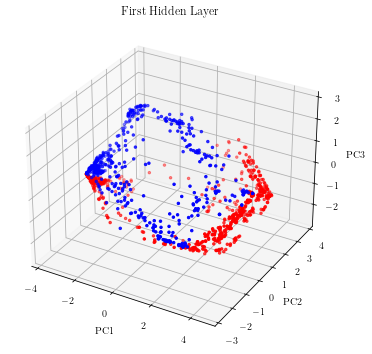

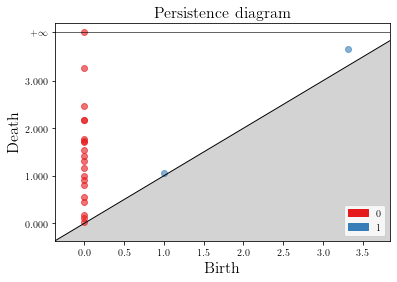

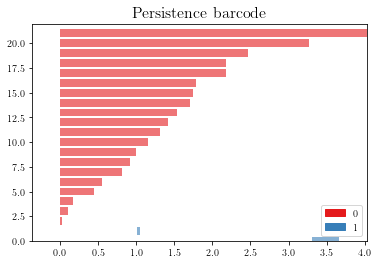

In [31]:
df1 = hidden_1_array

pca = PCA(n_components=3)
pca.fit(df1)

result=pd.DataFrame(pca.transform(df1), columns=['PCA%i' % i for i in range(3)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_0['PCA0'], result_0['PCA1'], result_0['PCA2'], c='blue', cmap="r", s=6)
ax.scatter(result_1['PCA0'], result_1['PCA1'], result_1['PCA2'], c='red', cmap="b", s=6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("First Hidden Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcH1 = gd.RipsComplex(points=hidden_1_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmH1 = rcH1.persistence()
gd.plot_persistence_diagram(rcdgmH1, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmH1, max_intervals=0, legend=True)

plt.show()

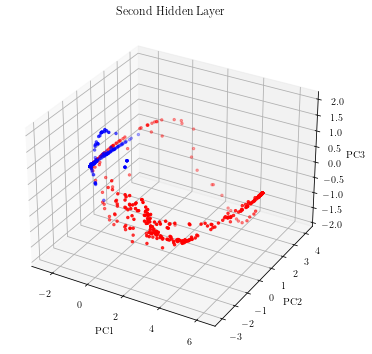

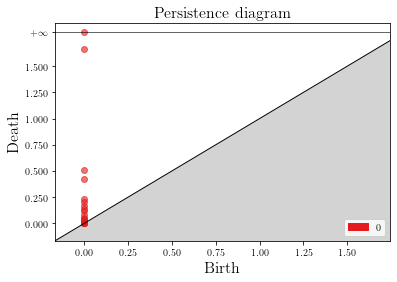

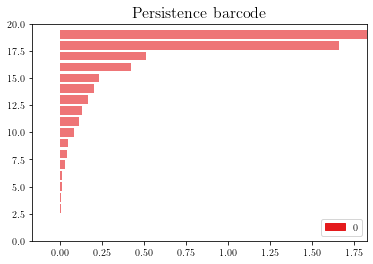

In [32]:
df1 = hidden_2_array

pca = PCA(n_components=3)
pca.fit(df1)

result=pd.DataFrame(pca.transform(df1), columns=['PCA%i' % i for i in range(3)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(result_0['PCA0'], result_0['PCA1'], result_0['PCA2'], c='blue', cmap="r", s=6)
ax.scatter(result_1['PCA0'], result_1['PCA1'], result_1['PCA2'], c='red', cmap="b", s=6)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Second Hidden Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcH2 = gd.RipsComplex(points=hidden_2_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmH2 = rcH2.persistence()
gd.plot_persistence_diagram(rcdgmH2, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmH2, max_intervals=0, legend=True)

plt.show()

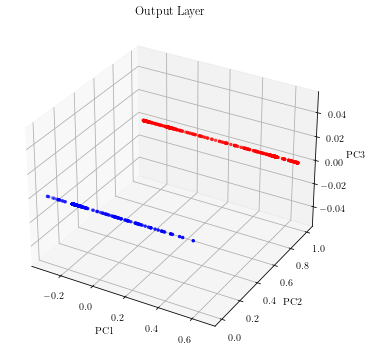

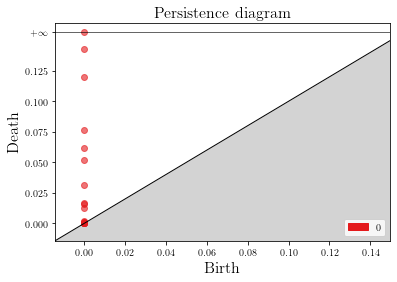

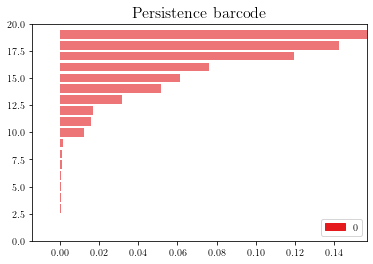

In [33]:
df1 = output_array

pca = PCA(n_components=1)
pca.fit(df1)

result=pd.DataFrame(pca.transform(df1), columns=['PCA%i' % i for i in range(1)])

result['class'] = class_vector
result.head()

result_0 = result[result['class'] == 0]
result_1 = result[result['class'] == 1]

fig = plt.figure()
fig.set_size_inches(6, 6)
ax = fig.add_subplot(111, projection='3d')

zeros = np.empty(len(result_0))
zeros.fill(0)

ones = np.empty(len(result_1))
ones.fill(1)

ax.scatter( result_0['PCA0'], zeros, zeros, c='blue', s=6) # Counterfit
ax.scatter(result_1['PCA0'], ones, zeros, c='red', s=6) # Genuine

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("Output Layer")

# ******* Persistance barcode and diagram for the first 20 elements *******
rcO = gd.RipsComplex(points=output_array[:20]).create_simplex_tree(max_dimension=3)
rcdgmO = rcO.persistence()
gd.plot_persistence_diagram(rcdgmO, max_intervals=0, legend=True)
gd.plot_persistence_barcode(rcdgmO, max_intervals=0, legend=True)

plt.show()

Here, we testing that Gudhi to make sure it returns a value we expect. This is just to ensure that Gudhi is working properly so that we can trust the output we recieved above. We use the example of a solid tetrahedron. All filtrations will be ascending.

We start by creating the 0-simplicies at the 4 verticies of the tertahedron. Then, we create the 1-simplicies connecting every vertex to eachother. Next, we will create the 2-simplicies. This has the effect of making each of the 4 faces of the tetrahedron solid. And finally, we create the 3-simplex. Simmilarly to the 2-simplex, it have the effect of making the inside of the tetrahedron solid. 

In [34]:
st = gd.SimplexTree()

st.insert([0], filtration = 0)         # Create a 0 simplex 
st.insert([1],filtration = 1)          # Create a 0 simplex 
st.insert([2], filtration = 2)         # Create a 0 simplex 
st.insert([3], filtration = 3)         # Create a 0 simplex 
st.insert([0,1], filtration = 4)       # Create a 1 simplex
st.insert([1,2], filtration = 5)       # Create a 1 simplex
st.insert([2,0], filtration = 6)       # Create a 1 simplex
st.insert([0,3], filtration = 7)       # Create a 1 simplex
st.insert([1,3], filtration = 8)       # Create a 1 simplex
st.insert([2,3], filtration = 9)       # Create a 1 simplex
st.insert([0,1,2], filtration = 10)    # Create a 2 simplex
st.insert([0,2,3], filtration = 11)    # Create a 2 simplex
st.insert([0,1,3], filtration = 12)    # Create a 2 simplex
st.insert([1,2,3], filtration = 13)    # Create a 2 simplex
st.insert([0,1,2,3], filtration = 14)  # Create a 3 simplex

True

This loop allows us to see that the filtration applied to each simplex correctly.

In [35]:
st_gen = st.get_filtration()

for splx in st_gen:
    print(splx)

([0], 0.0)
([1], 1.0)
([2], 2.0)
([3], 3.0)
([0, 1], 4.0)
([1, 2], 5.0)
([0, 2], 6.0)
([0, 3], 7.0)
([1, 3], 8.0)
([2, 3], 9.0)
([0, 1, 2], 10.0)
([0, 2, 3], 11.0)
([0, 1, 3], 12.0)
([1, 2, 3], 13.0)
([0, 1, 2, 3], 14.0)


And now we plot the persistence diagram and persistence barcode for the solid tetrahedron. Indeed, we see what we expect to see. 

<AxesSubplot:title={'center':'Persistence barcode'}>

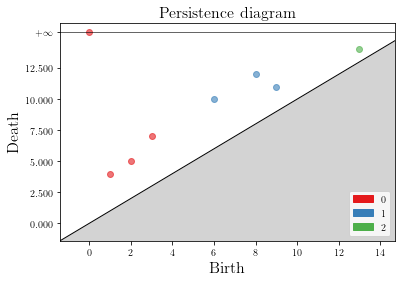

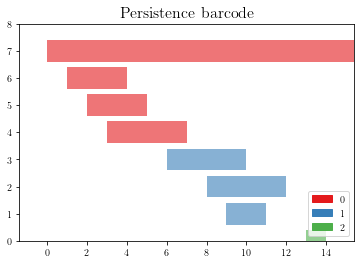

In [36]:
dgm = st.persistence(persistence_dim_max=True)
gd.plot_persistence_diagram(dgm, max_intervals=0, legend=True)
gd.plot_persistence_barcode(dgm, max_intervals=0, legend=True)

In [37]:
dgm

[(2, (13.0, 14.0)),
 (1, (8.0, 12.0)),
 (1, (6.0, 10.0)),
 (1, (9.0, 11.0)),
 (0, (0.0, inf)),
 (0, (3.0, 7.0)),
 (0, (2.0, 5.0)),
 (0, (1.0, 4.0))]